In [1]:
import os
import keras
from keras.applications import inception_v3
from keras.preprocessing import image
from keras.applications.imagenet_utils import decode_predictions
from skimage.io import imread
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

Using TensorFlow backend.
/Users/anirudh/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/anirudh/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/anirudh/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/anirudh/anaconda3/lib/python3.7/site-packag

# Using Inception

In [2]:
pretrained_inception = inception_v3.InceptionV3()

Instructions for updating:
Colocations handled automatically by placer.


In [3]:
def transform_img_fn(path_list):
    out = []
    for img_path in path_list:
        img = image.load_img(img_path, target_size=(299, 299))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = inception_v3.preprocess_input(x)
        out.append(x)
    return np.vstack(out)

('n02113712', 'miniature_poodle', 0.23822299)
('n02113799', 'standard_poodle', 0.15735732)
('n02091635', 'otterhound', 0.1461949)
('n02096051', 'Airedale', 0.045699287)
('n02102318', 'cocker_spaniel', 0.029833842)


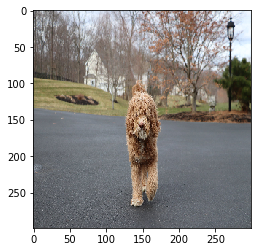

In [4]:
images = transform_img_fn([os.path.join('data','labradoodle.jpg')])
# I'm dividing by 2 and adding 0.5 because of how this Inception represents images
plt.imshow(images[0] / 2 + 0.5)
preds = pretrained_inception.predict(images)
for x in decode_predictions(preds)[0]:
    print(x)

# Explanation from LIME

In [5]:
import lime
from lime import lime_image

In [6]:
explainer = lime_image.LimeImageExplainer()

In [7]:
%%time
# Hide color is the color for a superpixel turned OFF. Alternatively, if it is NONE, the superpixel will be replaced by the average of its pixels
explanation = explainer.explain_instance(images[0], pretrained_inception.predict, top_labels=5, hide_color=0, num_samples=1000)

CPU times: user 12min, sys: 2min 1s, total: 14min 1s
Wall time: 2min 9s


## Visualize the explanation

In [8]:
from skimage.segmentation import mark_boundaries

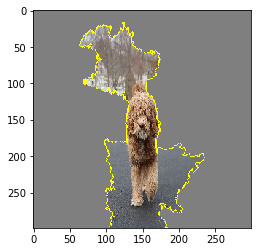

In [9]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=True)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

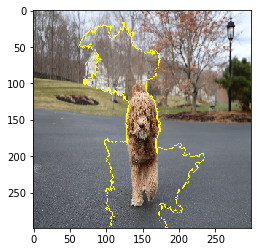

In [10]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

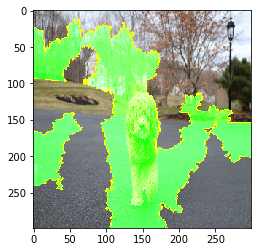

In [11]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=10, hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

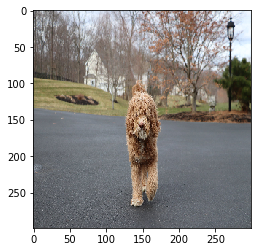

In [12]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=1000, hide_rest=False, min_weight=0.1)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

### Example 2

('n02112350', 'keeshond', 0.6853619)
('n02120079', 'Arctic_fox', 0.042144347)
('n02110063', 'malamute', 0.015486542)
('n02091467', 'Norwegian_elkhound', 0.013821518)
('n02112018', 'Pomeranian', 0.010111778)


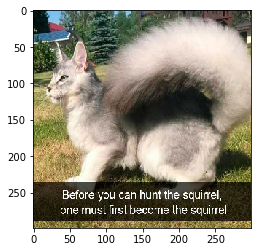

In [13]:
images = transform_img_fn([os.path.join('data','cat_squirrel.jpg')])
# I'm dividing by 2 and adding 0.5 because of how this Inception represents images
plt.imshow(images[0] / 2 + 0.5)
preds = pretrained_inception.predict(images)
for x in decode_predictions(preds)[0]:
    print(x)

In [14]:
%%time
# Hide color is the color for a superpixel turned OFF. Alternatively, if it is NONE, the superpixel will be replaced by the average of its pixels
explanation = explainer.explain_instance(images[0], pretrained_inception.predict, top_labels=5, hide_color=0, num_samples=1000)

CPU times: user 12min 5s, sys: 2min 1s, total: 14min 6s
Wall time: 2min 10s


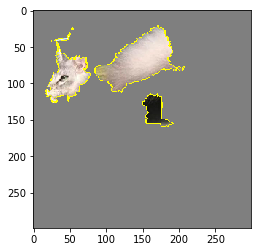

In [20]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[1], positive_only=True, num_features=5, hide_rest=True)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

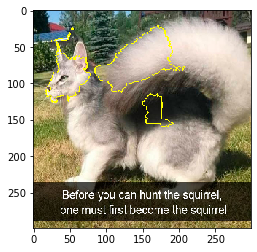

In [22]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[1], positive_only=True, num_features=5, hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

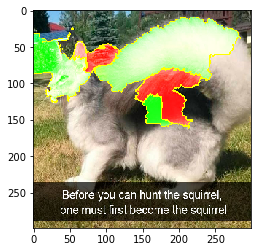

In [24]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[1], positive_only=False, num_features=10, hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

## Example 3

('n02403003', 'ox', 0.25289255)
('n02422106', 'hartebeest', 0.22449774)
('n02408429', 'water_buffalo', 0.15598404)
('n02437312', 'Arabian_camel', 0.041800022)
('n02504013', 'Indian_elephant', 0.031252507)


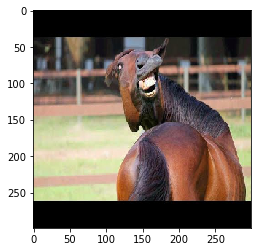

In [25]:
images = transform_img_fn([os.path.join('data','horse.jpg')])
# I'm dividing by 2 and adding 0.5 because of how this Inception represents images
plt.imshow(images[0] / 2 + 0.5)
preds = pretrained_inception.predict(images)
for x in decode_predictions(preds)[0]:
    print(x)

In [26]:
%%time
# Hide color is the color for a superpixel turned OFF. Alternatively, if it is NONE, the superpixel will be replaced by the average of its pixels
explanation = explainer.explain_instance(images[0], pretrained_inception.predict, top_labels=5, hide_color=0, num_samples=1000)

CPU times: user 12min 6s, sys: 2min 2s, total: 14min 9s
Wall time: 2min 12s


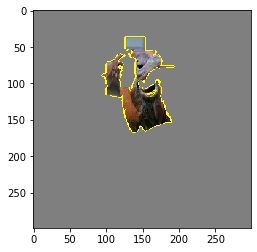

In [28]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[3], positive_only=True, num_features=5, hide_rest=True)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

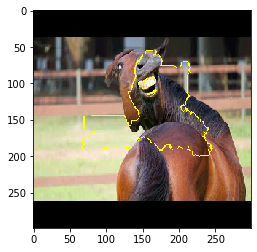

In [29]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

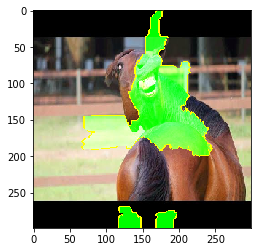

In [30]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=10, hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

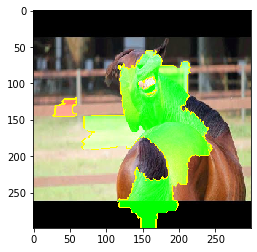

In [31]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[4], positive_only=False, num_features=10, hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

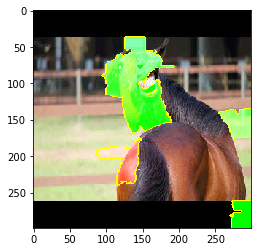

In [32]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[3], positive_only=False, num_features=10, hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))